## SMAP Data Visualization Example
This script pulls some static SMAP data and visualizes it somehow.

In [1]:
import netCDF4
import urllib
from mpl_toolkits.basemap import Basemap

url = ("http://n5eil01u.ecs.nsidc.org/opendap/SMAP/SPL1BTB.003/2015.05.23/"
       "SMAP_L1B_TB_01630_D_20150523T004154_R13080_001.h5.nc")

dataset = netCDF4.Dataset("SMAP_L1B_TB_01630_D_20150523T004154_R13080_001.h5.nc")

for var in dataset.variables:
    print(var)

_Brightness_Temperature_tb_3
_Brightness_Temperature_solar_specular_reflection_coefficient_h
_Brightness_Temperature_faraday_rotation_correction_h
_Brightness_Temperature_tb_right_ascension
_Brightness_Temperature_ta_3
_Brightness_Temperature_tb_time_utc
_Brightness_Temperature_nedt_h
_Brightness_Temperature_lunar_specular_lon
_Brightness_Temperature_antenna_sidelobe_correction_4
_Brightness_Temperature_galactic_direct_correction_h
_Brightness_Temperature_tb_qual_flag_h
_Brightness_Temperature_antenna_sidelobe_correction_3
_Brightness_Temperature_nedt_v
_Brightness_Temperature_solar_direct_theta
_Brightness_Temperature_specular_right_ascension
_Brightness_Temperature_lunar_specular_theta
_Brightness_Temperature_toa_v
_Brightness_Temperature_ta_filtered_4
_Brightness_Temperature_solar_direct_correction_h
_Brightness_Temperature_atm_loss
_Brightness_Temperature_solar_specular_correction_h
_Brightness_Temperature_ta_filtered_3
_Brightness_Temperature_lunar_specular_reflection_coefficient_

In [2]:
main_data = dataset.variables["_Brightness_Temperature_sea_ice_fraction"][:,:]
lat = dataset.variables["_Spacecraft_Data_sc_nadir_lat"][:]
lon = dataset.variables["_Spacecraft_Data_sc_nadir_lon"][:]

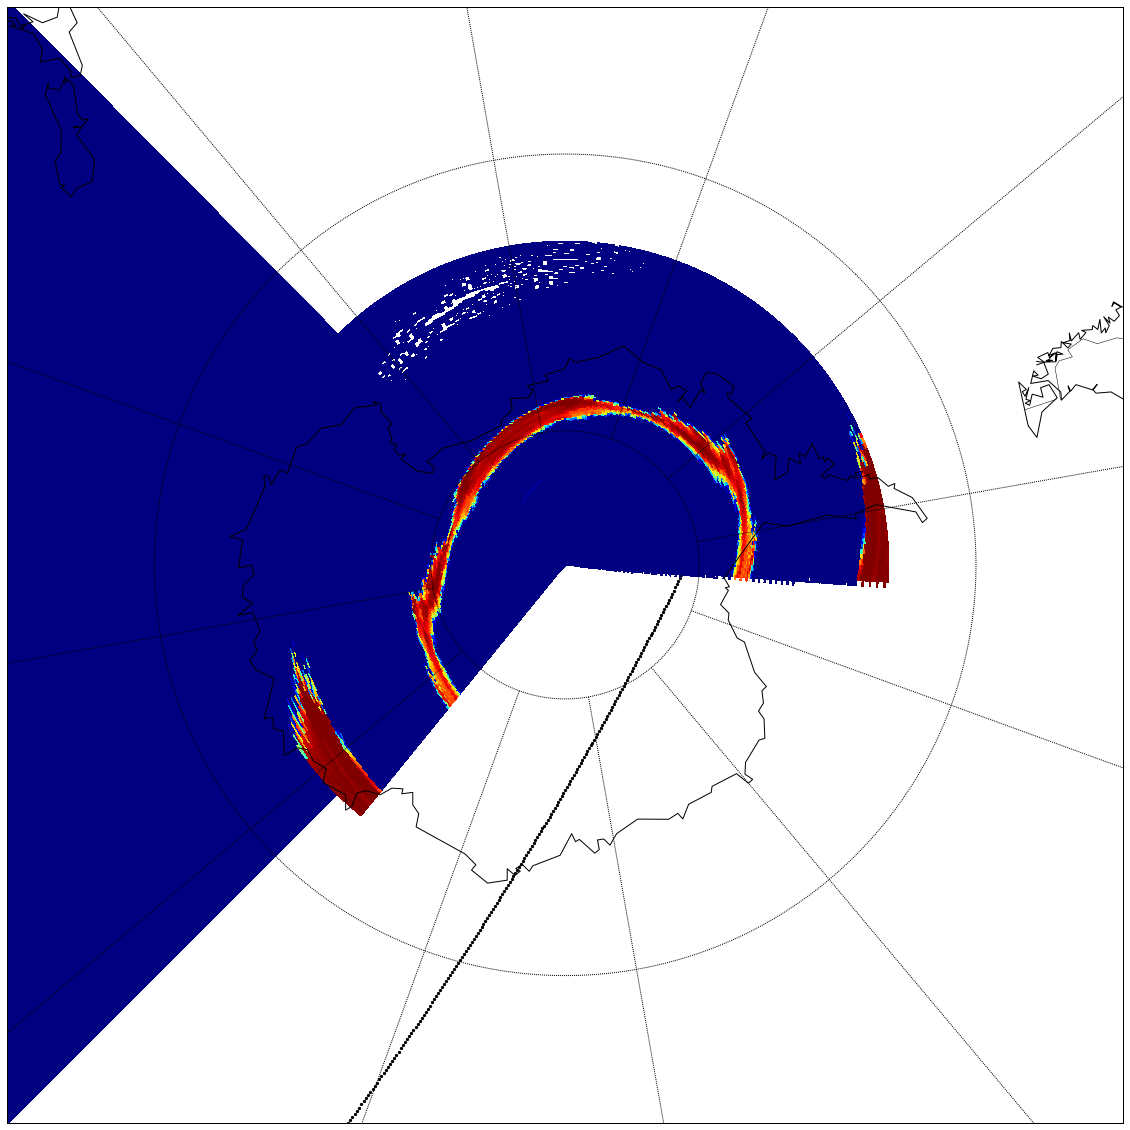

In [3]:
%matplotlib inline
from numpy import linspace, meshgrid
import numpy as np
import matplotlib.pyplot as plt

m = Basemap(projection='spstere', boundinglat=-50,lon_0=40, resolution='c')
#m = Basemap(projection='nsper',lon_0=50,lat_0=-90,
#        satellite_height=650*1000.,resolution='l')

plt.figure(figsize=(20,20))
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.drawcoastlines()
m.drawcountries()

x = linspace(lat[0], lat[0]+244,244)
y = linspace(lon[0], lon[778], 779)
px, py = np.meshgrid(x,y)
mx, my = m(px, py)
m.scatter(lon, lat, s=5, c='black', latlon=True)
m.pcolormesh(px, py, main_data, latlon=True)
#m.scatter(mx, my, s=1, c='yellow')

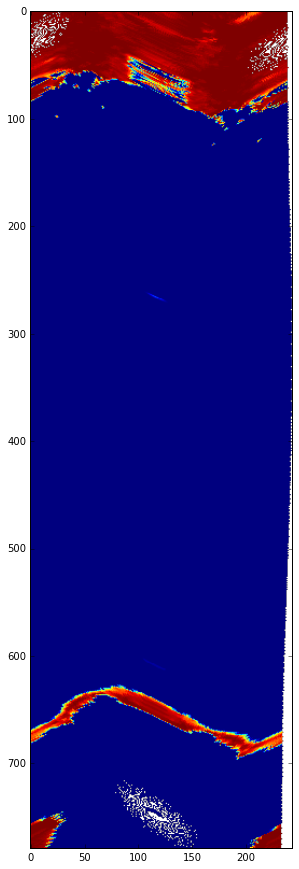

In [4]:
plt.figure(figsize=(15,15))
imgplt = plt.imshow(main_data)